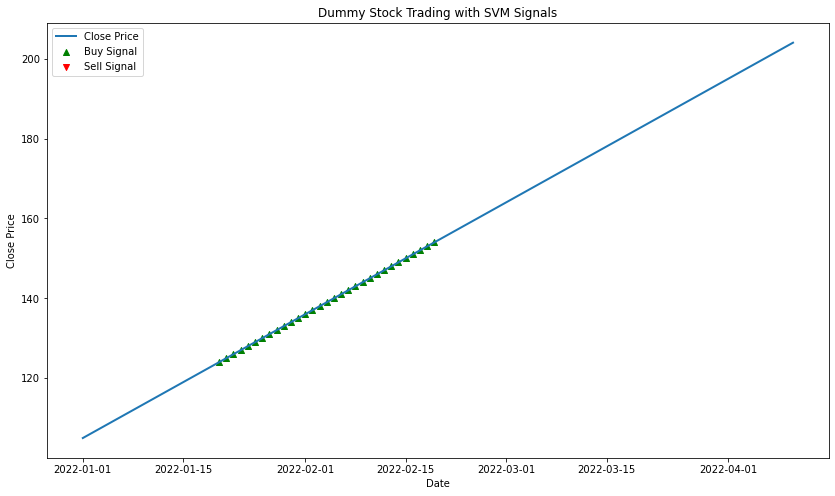

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt


data = {
    'Date': pd.date_range(start='2022-01-01', periods=100),
    'Open': [100 + i for i in range(100)],
    'High': [110 + i for i in range(100)],
    'Low': [90 + i for i in range(100)],
    'Close': [105 + i for i in range(100)],
    'Volume': [100000 + i * 1000 for i in range(100)],
    'Label': [1 if i < 50 else 0 for i in range(100)] 
}

df = pd.DataFrame(data)


X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


df['Predictions'] = svm_model.predict(X)


df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

df['Signal'] = 0  
df.loc[df['MA_5'] > df['MA_20'], 'Signal'] = 1  
df.loc[df['MA_5'] < df['MA_20'], 'Signal'] = -1  


df['Buy_Signal'] = (df['Predictions'] == 1) & (df['Signal'] == 1)
df['Sell_Signal'] = (df['Predictions'] == 0) & (df['Signal'] == -1)


plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=2)
plt.scatter(df[df['Buy_Signal']]['Date'], df[df['Buy_Signal']]['Close'], marker='^', color='g', label='Buy Signal')
plt.scatter(df[df['Sell_Signal']]['Date'], df[df['Sell_Signal']]['Close'], marker='v', color='r', label='Sell Signal')
plt.title('Dummy Stock Trading with SVM Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


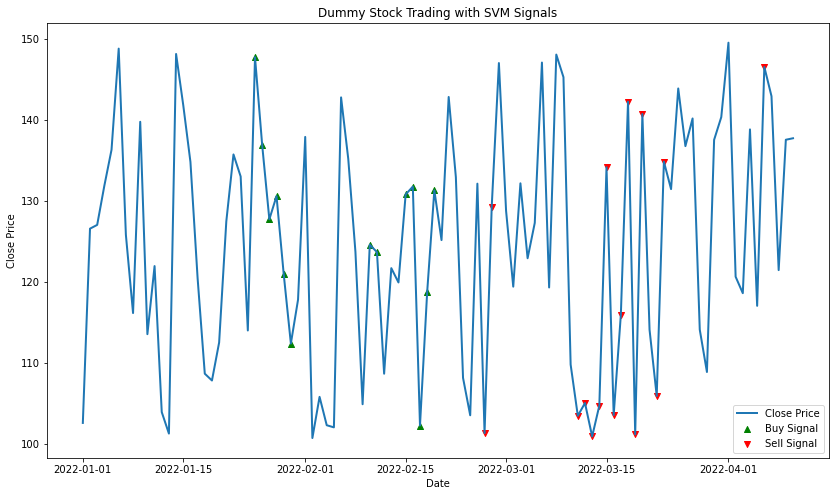

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt


np.random.seed(42)


data = {
    'Date': pd.date_range(start='2022-01-01', periods=100),
    'Open': np.random.uniform(100, 150, 100), 
    'High': np.random.uniform(110, 160, 100), 
    'Low': np.random.uniform(80, 120, 100),    
    'Close': np.random.uniform(100, 150, 100), 
    'Volume': [100000 + i * 1000 for i in range(100)],
    'Label': [1 if i < 50 else 0 for i in range(100)]  
}

df = pd.DataFrame(data)


X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


df['Predictions'] = svm_model.predict(X)


df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

df['Signal'] = 0  
df.loc[df['MA_5'] > df['MA_20'], 'Signal'] = 1  
df.loc[df['MA_5'] < df['MA_20'], 'Signal'] = -1  


df['Buy_Signal'] = (df['Predictions'] == 1) & (df['Signal'] == 1)
df['Sell_Signal'] = (df['Predictions'] == 0) & (df['Signal'] == -1)


plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=2)
plt.scatter(df[df['Buy_Signal']]['Date'], df[df['Buy_Signal']]['Close'], marker='^', color='g', label='Buy Signal')
plt.scatter(df[df['Sell_Signal']]['Date'], df[df['Sell_Signal']]['Close'], marker='v', color='r', label='Sell Signal')
plt.title('Dummy Stock Trading with SVM Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Confusion Matrix:
[[50  0]
 [ 0 50]]


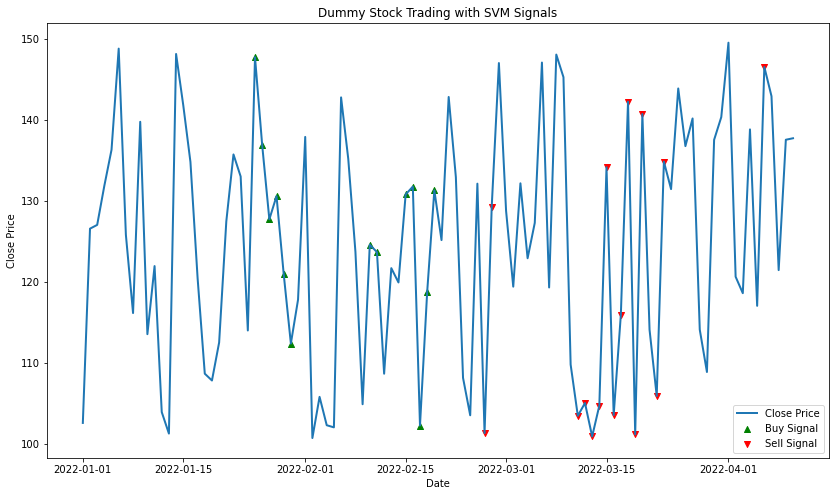

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt


np.random.seed(42)


data = {
    'Date': pd.date_range(start='2022-01-01', periods=100),
    'Open': np.random.uniform(100, 150, 100), 
    'High': np.random.uniform(110, 160, 100),  
    'Low': np.random.uniform(80, 120, 100),    
    'Close': np.random.uniform(100, 150, 100), 
    'Volume': [100000 + i * 1000 for i in range(100)],
    'Label': [1 if i < 50 else 0 for i in range(100)] 
}

df = pd.DataFrame(data)


X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


df['Predictions'] = svm_model.predict(X)


df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

df['Signal'] = 0  
df.loc[df['MA_5'] > df['MA_20'], 'Signal'] = 1 
df.loc[df['MA_5'] < df['MA_20'], 'Signal'] = -1 


df['Buy_Signal'] = (df['Predictions'] == 1) & (df['Signal'] == 1)
df['Sell_Signal'] = (df['Predictions'] == 0) & (df['Signal'] == -1)


accuracy = accuracy_score(df['Label'], df['Predictions'])
precision = precision_score(df['Label'], df['Predictions'])
recall = recall_score(df['Label'], df['Predictions'])
f1 = f1_score(df['Label'], df['Predictions'])

conf_matrix = confusion_matrix(df['Label'], df['Predictions'])

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=2)
plt.scatter(df[df['Buy_Signal']]['Date'], df[df['Buy_Signal']]['Close'], marker='^', color='g', label='Buy Signal')
plt.scatter(df[df['Sell_Signal']]['Date'], df[df['Sell_Signal']]['Close'], marker='v', color='r', label='Sell Signal')
plt.title('Dummy Stock Trading with SVM Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Accuracy: 0.5500
Precision: 0.4737
Recall: 0.4186
F1 Score: 0.4444

Confusion Matrix:
[[37 20]
 [25 18]]


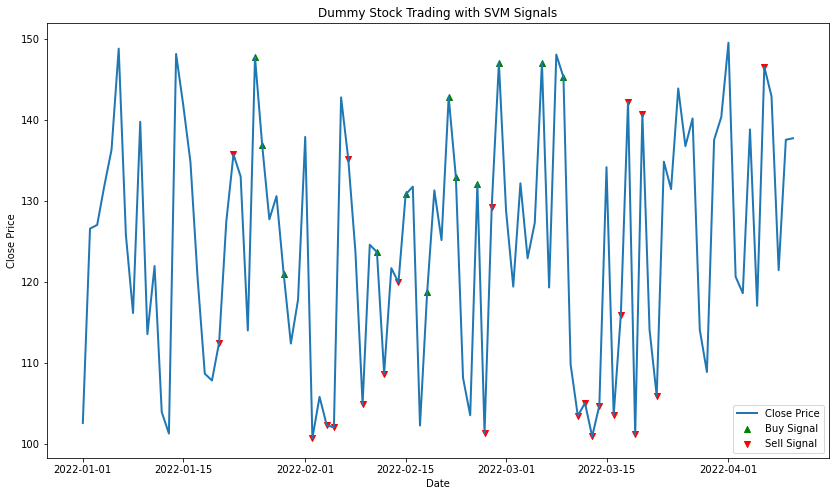

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a dummy stock dataset with random decimal values
data = {
    'Date': pd.date_range(start='2022-01-01', periods=100),
    'Open': np.random.uniform(100, 150, 100),  # Random values between 100 and 150
    'High': np.random.uniform(110, 160, 100),  # Random values between 110 and 160
    'Low': np.random.uniform(80, 120, 100),    # Random values between 80 and 120
    'Close': np.random.uniform(100, 150, 100), # Random values between 100 and 150
    'Volume': [100000 + i * 1000 for i in range(100)],
    'Label': np.random.choice([0, 1], size=100)  # Randomly choose between 0 and 1
}

df = pd.DataFrame(data)

# Separate features (X) and labels (y)
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the entire dataset
df['Predictions'] = svm_model.predict(X)

# Generate buy/sell signals using a basic moving average crossover strategy
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

df['Signal'] = 0  # 0 means hold, 1 means buy, -1 means sell
df.loc[df['MA_5'] > df['MA_20'], 'Signal'] = 1  # Buy signal
df.loc[df['MA_5'] < df['MA_20'], 'Signal'] = -1  # Sell signal

# Dummy trading: Buy when the model predicts 1 and there is a buy signal, sell when the model predicts 0 and there is a sell signal
df['Buy_Signal'] = (df['Predictions'] == 1) & (df['Signal'] == 1)
df['Sell_Signal'] = (df['Predictions'] == 0) & (df['Signal'] == -1)

# Calculate evaluation metrics
accuracy = accuracy_score(df['Label'], df['Predictions'])
precision = precision_score(df['Label'], df['Predictions'])
recall = recall_score(df['Label'], df['Predictions'])
f1 = f1_score(df['Label'], df['Predictions'])

conf_matrix = confusion_matrix(df['Label'], df['Predictions'])

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)

# Plotting for visualization
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=2)
plt.scatter(df[df['Buy_Signal']]['Date'], df[df['Buy_Signal']]['Close'], marker='^', color='g', label='Buy Signal')
plt.scatter(df[df['Sell_Signal']]['Date'], df[df['Sell_Signal']]['Close'], marker='v', color='r', label='Sell Signal')
plt.title('Dummy Stock Trading with SVM Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


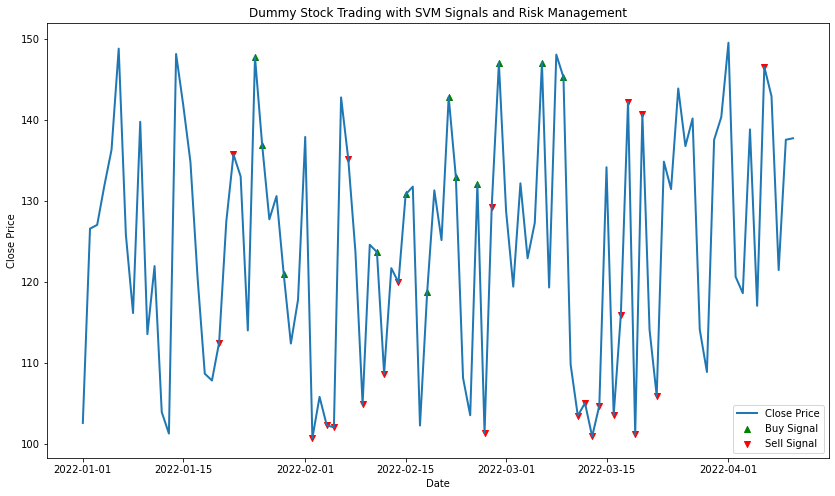

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Function for risk management
def calculate_position_size(account_size, risk_percent, entry_price, stop_loss):
    risk_amount = account_size * risk_percent
    position_size = risk_amount / (entry_price - stop_loss)
    return position_size

# Function to execute trades based on risk management
def execute_trade(row, account_size, risk_percent, stop_loss_percent):
    entry_price = row['Close']
    stop_loss = entry_price * (1 - stop_loss_percent)
    risk_amount = account_size * risk_percent

    if row['Buy_Signal']:
        position_size = calculate_position_size(account_size, risk_percent, entry_price, stop_loss)
        return position_size, entry_price, stop_loss, risk_amount
    elif row['Sell_Signal']:
        position_size = -calculate_position_size(account_size, risk_percent, entry_price, stop_loss)
        return position_size, entry_price, stop_loss, risk_amount
    else:
        return 0, 0, 0, 0

# Generate a dummy stock dataset with random decimal values
data = {
    'Date': pd.date_range(start='2022-01-01', periods=100),
    'Open': np.random.uniform(100, 150, 100),
    'High': np.random.uniform(110, 160, 100),
    'Low': np.random.uniform(80, 120, 100),
    'Close': np.random.uniform(100, 150, 100),
    'Volume': [100000 + i * 1000 for i in range(100)],
    'Label': np.random.choice([0, 1], size=100)
}

df = pd.DataFrame(data)

# Separate features (X) and labels (y)
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the entire dataset
df['Predictions'] = svm_model.predict(X)

# Generate buy/sell signals using a basic moving average crossover strategy
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

df['Signal'] = 0  # 0 means hold, 1 means buy, -1 means sell
df.loc[df['MA_5'] > df['MA_20'], 'Signal'] = 1  # Buy signal
df.loc[df['MA_5'] < df['MA_20'], 'Signal'] = -1  # Sell signal

# Dummy trading: Execute trades based on signals and risk management
df['Buy_Signal'] = (df['Predictions'] == 1) & (df['Signal'] == 1)
df['Sell_Signal'] = (df['Predictions'] == 0) & (df['Signal'] == -1)

account_size = 100000  # Replace with your desired initial capital
risk_percent = 0.02  # 2% risk per trade
stop_loss_percent = 0.01  # 1% stop loss

df['Position_Size'] = 0
df['Entry_Price'] = 0
df['Stop_Loss'] = 0
df['Risk_Amount'] = 0

# Loop through the dataset and execute trades
for index, row in df.iterrows():
    position_size, entry_price, stop_loss, risk_amount = execute_trade(row, account_size, risk_percent, stop_loss_percent)
    df.at[index, 'Position_Size'] = position_size
    df.at[index, 'Entry_Price'] = entry_price
    df.at[index, 'Stop_Loss'] = stop_loss
    df.at[index, 'Risk_Amount'] = risk_amount

# Plotting for visualization
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=2)
plt.scatter(df[df['Buy_Signal']]['Date'], df[df['Buy_Signal']]['Close'], marker='^', color='g', label='Buy Signal')
plt.scatter(df[df['Sell_Signal']]['Date'], df[df['Sell_Signal']]['Close'], marker='v', color='r', label='Sell Signal')
plt.title('Dummy Stock Trading with SVM Signals and Risk Management')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


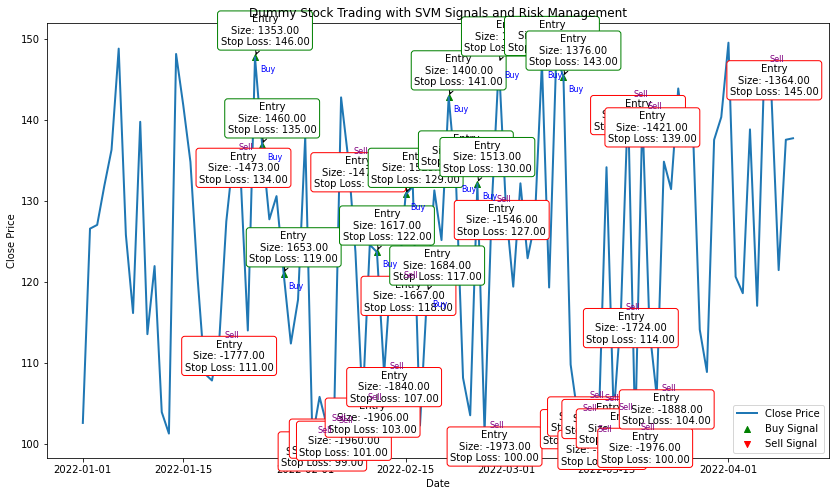

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\djsce.student\Anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 171, in _merge_into_criterion
    crit = self.state.criteria[name]
KeyError: 'tensorflow-intel'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\djsce.student\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\djsce.student\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\djsce.student\Anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\djsce.student\Anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\Users\djsce.student\Anaconda3\lib\http\client.py", line 502, in readinto
    n = 

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Function for risk management
def calculate_position_size(account_size, risk_percent, entry_price, stop_loss):
    risk_amount = account_size * risk_percent
    position_size = risk_amount / (entry_price - stop_loss)
    return position_size

# Function to execute trades based on risk management
def execute_trade(row, account_size, risk_percent, stop_loss_percent):
    entry_price = row['Close']
    stop_loss = entry_price * (1 - stop_loss_percent)
    risk_amount = account_size * risk_percent

    if row['Buy_Signal']:
        position_size = calculate_position_size(account_size, risk_percent, entry_price, stop_loss)
        return position_size, entry_price, stop_loss, risk_amount
    elif row['Sell_Signal']:
        position_size = -calculate_position_size(account_size, risk_percent, entry_price, stop_loss)
        return position_size, entry_price, stop_loss, risk_amount
    else:
        return 0, 0, 0, 0

# Generate a dummy stock dataset with random decimal values
data = {
    'Date': pd.date_range(start='2022-01-01', periods=100),
    'Open': np.random.uniform(100, 150, 100),
    'High': np.random.uniform(110, 160, 100),
    'Low': np.random.uniform(80, 120, 100),
    'Close': np.random.uniform(100, 150, 100),
    'Volume': [100000 + i * 1000 for i in range(100)],
    'Label': np.random.choice([0, 1], size=100)
}

df = pd.DataFrame(data)

# Separate features (X) and labels (y)
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the entire dataset
df['Predictions'] = svm_model.predict(X)

# Generate buy/sell signals using a basic moving average crossover strategy
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

df['Signal'] = 0  # 0 means hold, 1 means buy, -1 means sell
df.loc[df['MA_5'] > df['MA_20'], 'Signal'] = 1  # Buy signal
df.loc[df['MA_5'] < df['MA_20'], 'Signal'] = -1  # Sell signal

# Dummy trading: Execute trades based on signals and risk management
df['Buy_Signal'] = (df['Predictions'] == 1) & (df['Signal'] == 1)
df['Sell_Signal'] = (df['Predictions'] == 0) & (df['Signal'] == -1)

account_size = 100000  # Replace with your desired initial capital
risk_percent = 0.02  # 2% risk per trade
stop_loss_percent = 0.01  # 1% stop loss

df['Position_Size'] = 0
df['Entry_Price'] = 0
df['Stop_Loss'] = 0
df['Risk_Amount'] = 0

# Lists to store trade execution points
buy_points = []
sell_points = []

# Loop through the dataset and execute trades
for index, row in df.iterrows():
    position_size, entry_price, stop_loss, risk_amount = execute_trade(row, account_size, risk_percent, stop_loss_percent)
    df.at[index, 'Position_Size'] = position_size
    df.at[index, 'Entry_Price'] = entry_price
    df.at[index, 'Stop_Loss'] = stop_loss
    df.at[index, 'Risk_Amount'] = risk_amount
    
    if row['Buy_Signal']:
        buy_points.append((row['Date'], row['Close']))
    elif row['Sell_Signal']:
        sell_points.append((row['Date'], row['Close']))

# Plotting for visualization
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=2)
plt.scatter(df[df['Buy_Signal']]['Date'], df[df['Buy_Signal']]['Close'], marker='^', color='g', label='Buy Signal')
plt.scatter(df[df['Sell_Signal']]['Date'], df[df['Sell_Signal']]['Close'], marker='v', color='r', label='Sell Signal')

# Annotate entry points, stop-loss levels, and position sizes
for index, row in df.iterrows():
    if row['Buy_Signal']:
        plt.annotate(f'Entry\nSize: {row["Position_Size"]:.2f}\nStop Loss: {row["Stop_Loss"]:.2f}',
                     xy=(row['Date'], row['Close']), xytext=(10, 10),
                     textcoords='offset points', ha='center', va='bottom',
                     bbox=dict(boxstyle='round,pad=0.3', edgecolor='green', facecolor='white'),
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    elif row['Sell_Signal']:
        plt.annotate(f'Entry\nSize: {row["Position_Size"]:.2f}\nStop Loss: {row["Stop_Loss"]:.2f}',
                     xy=(row['Date'], row['Close']), xytext=(10, -30),
                     textcoords='offset points', ha='center', va='bottom',
                     bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white'),
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Plot arrows for trade execution points
for point in buy_points:
    plt.annotate('Buy', xy=point, xytext=(5, -15), textcoords='offset points', color='blue', fontsize=8)
for point in sell_points:
    plt.annotate('Sell', xy=point, xytext=(5, 5), textcoords='offset points', color='purple', fontsize=8)

plt.title('Dummy Stock Trading with SVM Signals and Risk Management')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.savefig('dummy_stock_trading_plot.png')
plt.show()


Total Buy Signals: 774
Total Sell Signals: 775
Total Correct Buy Signals: 774
Total Correct Sell Signals: 775


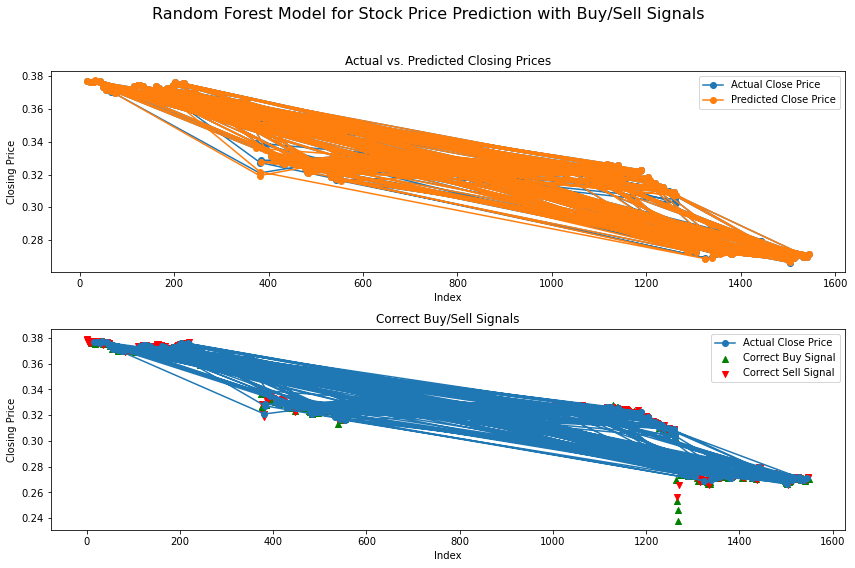

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


data = pd.read_csv('1inch_usd.csv')


X = data[['open', 'high', 'low', 'volume']]
y = data['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


data['buy_signal'] = data['close'] < model.predict(data[['open', 'high', 'low', 'volume']])
data['sell_signal'] = data['close'] > model.predict(data[['open', 'high', 'low', 'volume']])


total_buy_signals = data['buy_signal'].sum()
total_sell_signals = data['sell_signal'].sum()


correct_buy_signals = data[(data['buy_signal']) & (data['close'] < model.predict(data[['open', 'high', 'low', 'volume']]))]
correct_sell_signals = data[(data['sell_signal']) & (data['close'] > model.predict(data[['open', 'high', 'low', 'volume']]))]


total_correct_buy_signals = correct_buy_signals.shape[0]
total_correct_sell_signals = correct_sell_signals.shape[0]


print(f"Total Buy Signals: {total_buy_signals}")
print(f"Total Sell Signals: {total_sell_signals}")
print(f"Total Correct Buy Signals: {total_correct_buy_signals}")
print(f"Total Correct Sell Signals: {total_correct_sell_signals}")


plt.figure(figsize=(12, 8))


plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test.values, label='Actual Close Price', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', marker='o')
plt.title('Actual vs. Predicted Closing Prices')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test.values, label='Actual Close Price', marker='o')
plt.scatter(correct_buy_signals.index, correct_buy_signals['close'], marker='^', color='g', label='Correct Buy Signal')
plt.scatter(correct_sell_signals.index, correct_sell_signals['close'], marker='v', color='r', label='Correct Sell Signal')
plt.title('Correct Buy/Sell Signals')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()


plt.suptitle('Random Forest Model for Stock Price Prediction with Buy/Sell Signals', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.savefig('dummy_stock_trading_plot1.png')
plt.show()


Total Buy Signals: 774
Total Sell Signals: 775
Total Correct Buy Signals: 774
Total Correct Sell Signals: 775


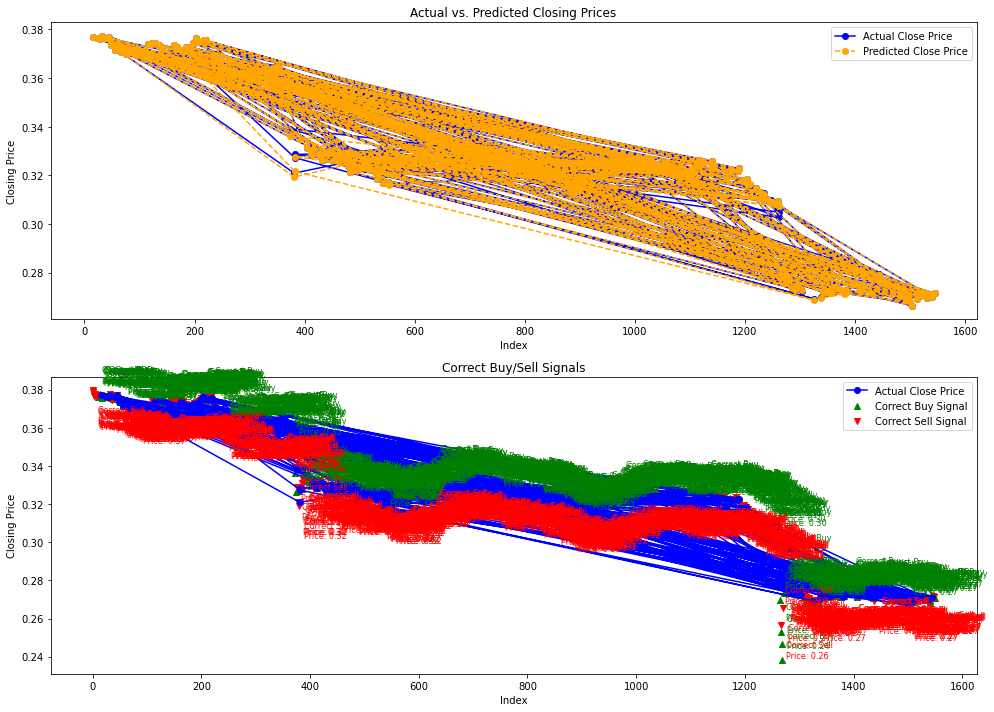

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


data = pd.read_csv('1inch_usd.csv')


X = data[['open', 'high', 'low', 'volume']]
y = data['close']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


data['buy_signal'] = data['close'] < model.predict(data[['open', 'high', 'low', 'volume']])
data['sell_signal'] = data['close'] > model.predict(data[['open', 'high', 'low', 'volume']])


total_buy_signals = data['buy_signal'].sum()
total_sell_signals = data['sell_signal'].sum()

correct_buy_signals = data[(data['buy_signal']) & (data['close'] < model.predict(data[['open', 'high', 'low', 'volume']]))]
correct_sell_signals = data[(data['sell_signal']) & (data['close'] > model.predict(data[['open', 'high', 'low', 'volume']]))]


total_correct_buy_signals = correct_buy_signals.shape[0]
total_correct_sell_signals = correct_sell_signals.shape[0]


print(f"Total Buy Signals: {total_buy_signals}")
print(f"Total Sell Signals: {total_sell_signals}")
print(f"Total Correct Buy Signals: {total_correct_buy_signals}")
print(f"Total Correct Sell Signals: {total_correct_sell_signals}")


plt.figure(figsize=(14, 10))


plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test.values, label='Actual Close Price', marker='o', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', marker='o', linestyle='dashed', color='orange')
plt.title('Actual vs. Predicted Closing Prices')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test.values, label='Actual Close Price', marker='o', color='blue')
plt.scatter(correct_buy_signals.index, correct_buy_signals['close'], marker='^', color='g', label='Correct Buy Signal')
plt.scatter(correct_sell_signals.index, correct_sell_signals['close'], marker='v', color='r', label='Correct Sell Signal')


for _, row in correct_buy_signals.iterrows():
    plt.annotate(f'Correct Buy\nPrice: {row["close"]:.2f}', xy=(row.name, row["close"]),
                 xytext=(5, 10), textcoords='offset points', ha='left', va='bottom', color='green', fontsize=8)


for _, row in correct_sell_signals.iterrows():
    plt.annotate(f'Correct Sell\nPrice: {row["close"]:.2f}', xy=(row.name, row["close"]),
                 xytext=(5, -15), textcoords='offset points', ha='left', va='top', color='red', fontsize=8)

plt.title('Correct Buy/Sell Signals')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()

plt.tight_layout()
plt.show()


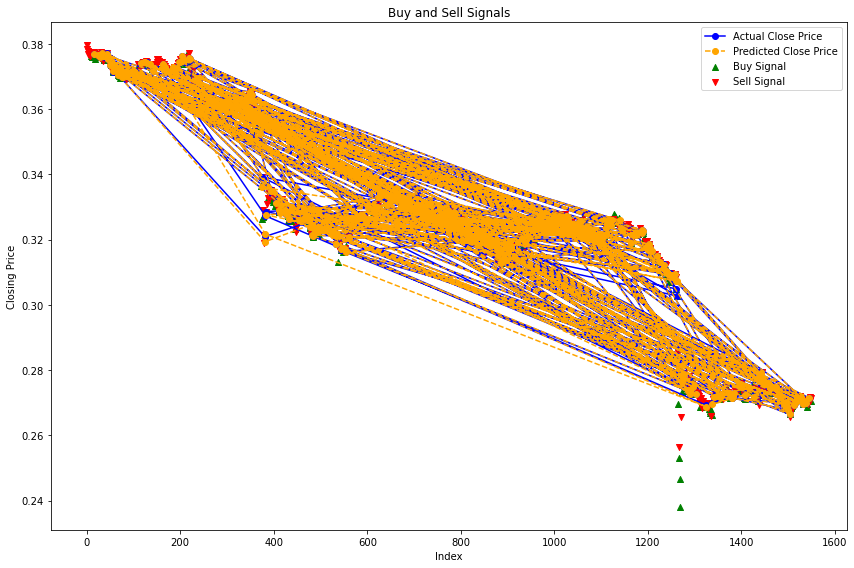

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


data = pd.read_csv('1inch_usd.csv')


X = data[['open', 'high', 'low', 'volume']]
y = data['close']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


data['buy_signal'] = data['close'] < model.predict(data[['open', 'high', 'low', 'volume']])
data['sell_signal'] = data['close'] > model.predict(data[['open', 'high', 'low', 'volume']])


plt.figure(figsize=(12, 8))


plt.plot(y_test.index, y_test.values, label='Actual Close Price', marker='o', linestyle='-', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', marker='o', linestyle='--', color='orange')
plt.title('Actual vs. Predicted Closing Prices')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()


plt.scatter(data[data['buy_signal']].index, data[data['buy_signal']]['close'],
            marker='^', color='g', label='Buy Signal')
plt.scatter(data[data['sell_signal']].index, data[data['sell_signal']]['close'],
            marker='v', color='r', label='Sell Signal')

plt.title('Buy and Sell Signals')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()

plt.tight_layout()
plt.show()
